In [97]:
import pandas as pd
import numpy as np
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
import itertools
import time
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## Regression Analysis

We expected that name will have a significance in price, thus, we counts the number of positive words in names of Airbnb and added to the data.

In [ ]:
data4 = pd.read_excel('forregression.xlsx')

,name,description
45,Bright and Charming Heart of HK Apartment,This listing is for the west bedroom in a full...
46,Luxury Apt. Lots of Natural Light. Train nearby,You will love my apartment once you enter the ...
47,Gorgeous large 1 bedroom apt for Aug - Sept.,"Nicely furnished large, 1 bed apt in Hudson He..."
48,Private Room in Light-Filled Apt with Gym,We welcome travelers to stay in a private room...
49,Charming exposed brick apartment,A beaitifully spacious and very sunny one bedr...


In [124]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
#import geopandas as gpd
from PIL import Image
import requests
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import word_tokenize
import nltk

In [125]:
name_string = ' '.join(name).lower()
words = word_tokenize(name_string)
des_string  = ' '.join(description).lower()
words2 = word_tokenize(des_string)


In [126]:
#removing words related to other columns since we don't want to have the same effects of other analysis
neighbourhood = [x.lower() for x in data4['neighbourhood']]

In [127]:
#order by the frequencies of words in name
freq ={}
for i in words:
    if i in freq:
        freq[i] +=1
    else:
        freq[i] = 1
freq2 ={}
for i in words2:
    if i in freq2:
        freq2[i] +=1
    else:
        freq2[i] = 1

In [159]:
#Import a list of words
positive = open('C:\\Users\\kjumi\\OneDrive\\MyDoctorateStudy\\positive-words.txt', 'r')
file = positive.read()
positivewords = file.split("\n")


In [160]:
name_freq = []
for i in name:
    count = 0
    words = word_tokenize(i)
    for w in words:
        if w in positivewords:
            count += 1
    name_freq.append(count)
            

In [161]:
des_freq = []
for i in description:
    count = 0
    words = word_tokenize(i)
    for w in words:
        if w in positivewords:
            count += 1
    des_freq.append(count)

In [186]:

data4[['name', 'description']].iloc

ValueError: No axis named 165 for object type <class 'type'>

In [168]:
name_freq_d = []
for i in name:
    count = 0
    words = word_tokenize(i)
    for w in words:
        if w in positivewords:
            print(w)
            count += 1
    name_freq_d.append(count)
    
    (165) #, 288, 488, 657, 751]

In [189]:
des_freq[165]

5

In [462]:
# name contains positive words
nonzero = [x != 0 for x in name_freq]
sum(nonzero)/len(data4)

0.10747385931558935

In [463]:
# description contains positive words
nonzero = [x != 0 for x in des_freq]
sum(nonzero)/len(data4)

0.964472433460076

1809 out of 16832 has positive words in the name of there air bnb

In [489]:
# added a column with positive word counts of names
data4['name positive word counts'] = name_freq
data4['description positive word counts'] = des_freq

C:\Users\kjumi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kjumi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Binarization

In [523]:
data4.dtypes

id                                    int64
property_type                        object
room_type                             int64
amenities                            object
accommodates                          int64
bathrooms                           float64
bed_type                              int64
cancellation_policy                   int64
cleaning_fee                          int64
city                                 object
description                          object
host_has_profile_pic                  int64
host_identity_verified                int64
host_response_rate                  float64
host_since                            int64
instant_bookable                      int64
last_review                          object
latitude                            float64
longitude                           float64
name                                 object
neighbourhood                        object
number_of_reviews                     int64
review_scores_rating            

## room_type <- ordinal 

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

Categorical:
* property_type

ordinal:
* room_type
* bed_type
* cancellation_policy

Binary:
* host_has_profile_pic
* host_identity_verified
* instant_bookable 
* cleaning_fee

needs to change into numeric values
* host_response_rate
* host_since
* amentities

In [190]:
labelencoder = LabelEncoder()
data_reg['property_type'] = labelencoder.fit_transform(data_reg['property_type'])

In [191]:
result = []
for i in data4['room_type']:
    if i == 'Shared room':
        r = 1
    if i  == 'Private room':
        r = 2
    if i == 'Entire home/apt':
        r = 3
    result.append(r)
data_reg['room_type'] = result

In [192]:
result2 = []
for i in data4['bed_type']:
    if i in ['Couch', 'Futon', 'Pull-out Sofa']:
        r = 1
    if i  == 'Airbed':
        r = 2
    if i == 'Real Bed':
        r = 3
    result2.append(r)
data_reg['bed_type'] = result2

In [193]:
result3 = []
for i in data4['cancellation_policy']:
    if i in 'flexible':
        r = 1
    if i  == 'moderate':
        r = 2
    if i == 'strict':
        r = 3
    if i == 'super_strict_30':
        r = 4
    result3.append(r)
data_reg['cancellation_policy'] = result3

In [194]:
result4 = []
for i in data4['host_has_profile_pic']:
    if i in 'f':
        r = 0
    if i  == 't':
        r = 1
    result4.append(r)
data_reg['host_has_profile_pic'] = result4

In [195]:
result5 = []
for i in data4['host_identity_verified']:
    if i in 'f':
        r = 0
    if i  == 't':
        r = 1
    result5.append(r)
data_reg['host_identity_verified'] = result5

In [196]:
result5 = []
for i in data4['instant_bookable']:
    if i in 'f':
        r = 0
    if i  == 't':
        r = 1
    result5.append(r)
data_reg['instant_bookable'] = result5

In [197]:
result5 = []
for i in data4['cleaning_fee']:
    if i == False:
        r = 0
    if i  == True:
        r = 1
    result5.append(r)
data_reg['cleaning_fee'] = result5

In [198]:
data_reg['host_response_rate'] = [int(x.replace("%", ""))/100 for x in data4['host_response_rate']]

In [199]:
#changing the review date as the spread between the last date of the data and the date.

import datetime

lastday = datetime.datetime.strptime('2017-10-04', '%Y-%m-%d').date()
spread_list2 = []
for i in data4['host_since']:
    date = datetime.datetime.strptime(i, '%Y-%m-%d').date()
    spread = lastday - date
    spread = spread.days
    spread_list2.append(spread)
data_reg['host_since'] = spread_list2

In [201]:
data_reg.head()

,Unnamed: 0,Unnamed: 0.1,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,review_scores_rating,bedrooms,beds,Central Park,Financial District,Soho,price,last_review_diff,name positive word counts,description positive word counts
0,0,0,0,3,15,7,1.0,3,3,1,...,93,3,3,2.728720,7.066028,4.903964,169,11,0,8
1,1,1,0,3,19,5,1.0,3,2,1,...,92,1,3,3.343312,12.713990,10.668985,145,20,0,3
2,2,2,0,2,15,2,1.0,3,3,1,...,93,1,1,6.744463,2.888515,1.612527,100,323,0,9
3,3,3,14,3,24,8,1.0,3,3,1,...,72,3,3,15.518758,8.121885,9.875868,99,19,0,1
4,4,4,14,2,11,2,1.5,3,3,1,...,89,1,1,14.533487,8.773295,10.071773,40,12,0,4


In [542]:
data_reg.to_excel('C:\\Users\\kjumi\\Downloads\\new-york-city-airbnb-open-data\\AB_NYC_UPDATED_reg1.xlsx')

## Descriptions of data

In [7]:
import pandas as pd
file = 'C:\\Users\\kjumi\\Downloads\\new-york-city-airbnb-open-data\\AB_NYC_UPDATED_reg2.xlsx'
#data = pd.io.parsers.read_csv(file)
data_reg = pd.read_excel(file)


In [205]:

data_reg2 = data_reg.drop(['Unnamed: 0', 'Unnamed: 0.1', 'property_type'], axis= 1)
data_reg2.dtypes

room_type                             int64
amenities                             int64
accommodates                          int64
bathrooms                           float64
bed_type                              int64
cancellation_policy                   int64
cleaning_fee                          int64
host_has_profile_pic                  int64
host_identity_verified                int64
host_response_rate                  float64
host_since                            int64
instant_bookable                      int64
latitude                            float64
longitude                           float64
number_of_reviews                     int64
review_scores_rating                  int64
bedrooms                              int64
beds                                  int64
Central Park                        float64
Financial District                  float64
Soho                                float64
price                                 int64
last_review_diff                

In [203]:
data_reg2.to_excel('C:\\Users\\kjumi\\Downloads\\new-york-city-airbnb-open-data\\AB_NYC_UPDATED_reg_F.xlsx')

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

Index(['room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'latitude', 'longitude', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'Central Park',
       'Financial District', 'Soho', 'price', 'last_review_diff',
       'name positive word counts', 'description positive word counts'],
      dtype='object')

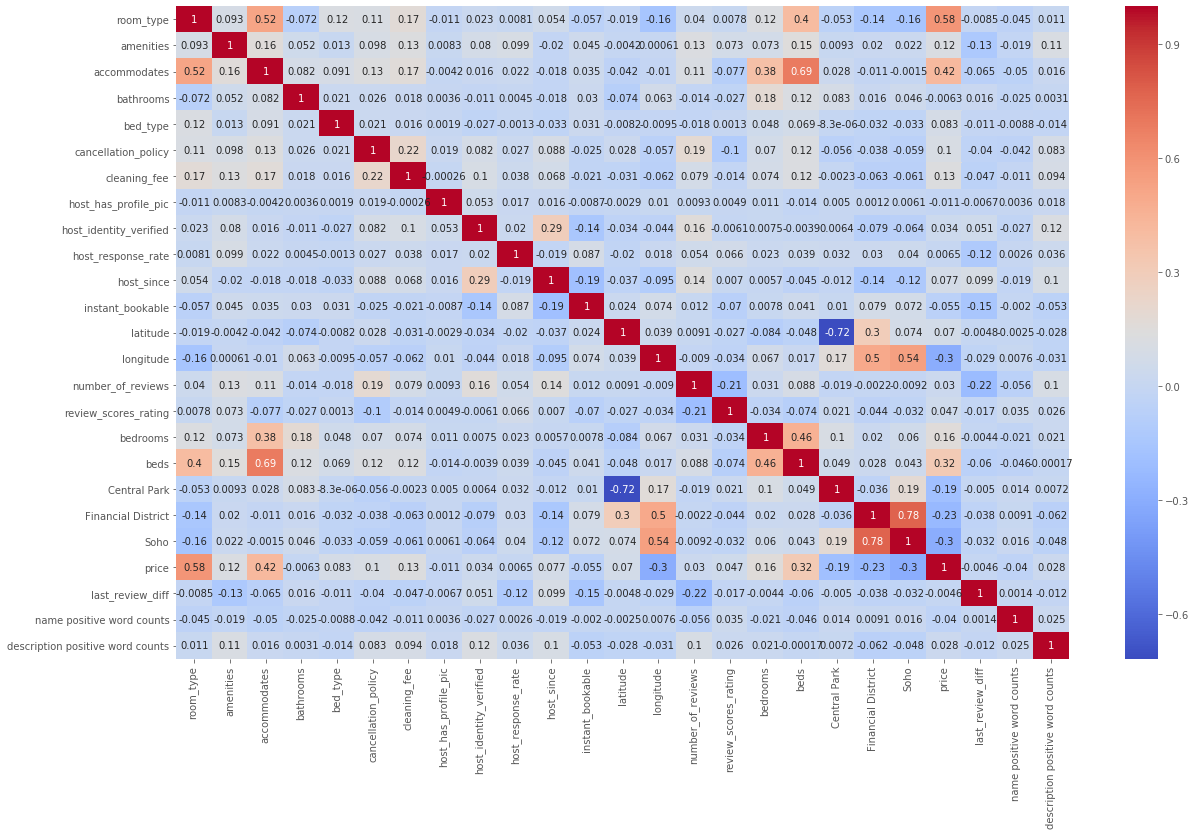

In [208]:
import seaborn as sns
corr = data_reg2.corr(method  = 'kendall')
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot = True, cmap='coolwarm')
data_reg2.columns

In [210]:
#Defining the independent variables and dependent variables

x = data_reg2.drop(['price'], axis = 1)
y = data_reg2['price']

#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=353)
x_train.head()
y_train.head()


5447      73
14320     65
13096    150
12745     60
9118      43
Name: price, dtype: int64

In [211]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.6086772165508264

In [222]:
import statsmodels.api as sm

model = sm.OLS(y_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              5933.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        22:01:55   Log-Likelihood:                         -68680.
No. Observations:               13465   AIC:                                  1.374e+05
Df Residuals:                   13441   BIC:                                  1.376e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
room_type                           52.3532      0.769     68.048      0.000      50.845      53.861
amenities                            0.6171      0.050     12.374      0.000       0.519       0.715
accommodates                         9.2299      0.406     22.741      0.000       8.434      10.025
bathrooms                            6.7332      1.099      6.128      0.000       4.580       8.887
bed_type                            -0.6209      1.078     -0.576      0.565      -2.734       1.492
cancellation_policy                  0.2505      0.471      0.532      0.595      -0.673       1.174
cleaning_fee                        -0.5929      0.903     -0.657      0.511      -2.362       1.176
host_has_profile_pic                -2.8423      8.925     -0.318      0.750     -20.336      14.652
host_identity_verified              -0.9246      0.798     -1.158      0.247      -2.489       0.640
host_response_rate                  -1.0150      2.648     -0.383      0.701      -6.205       4.175
host_since                           0.0026      0.001      4.659      0.000       0.002       0.004
instant_bookable                    -0.7623      0.786     -0.970      0.332      -2.302       0.778
latitude                          -188.1771     14.163    -13.287      0.000    -215.938    -160.416
longitude                         -102.4284      7.795    -13.141      0.000    -117.707     -87.150
number_of_reviews                   -0.0742      0.009     -7.864      0.000      -0.093      -0.056
review_scores_rating                 0.3647      0.048      7.539      0.000       0.270       0.460
bedrooms                            11.8104      0.715     16.507      0.000      10.408      13.213
beds                                 0.4259      0.620      0.686      0.492      -0.790       1.642
Central Park                         0.7778      0.189      4.125      0.000       0.408       1.147
Financial District                  17.7910      0.536     33.212      0.000      16.741      18.841
Soho                               -21.1667      0.552    -38.339      0.000     -22.249     -20.085
last_review_diff                     0.0143      0.003      5.698      0.000       0.009       0.019
name positive word counts            0.1764      0.883      0.200      0.842      -1.555       1.907
description positive word counts     0.0858      0.093      0.924      0.356      -0.096       0.268
==============================================================================
Omnibus:                     1452.222   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2913.923
Skew:               

## forward-backward feature selection

In [212]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

In [221]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.01, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(x_train,y_train)

print('resulting features:')
print(result)

C:\Users\kjumi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\kjumi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  longitude                      with p-value 0.0
Add  room_type                      with p-value 0.0
Add  accommodates                   with p-value 0.0
Add  Central Park                   with p-value 5.98072e-202
Add  Soho                           with p-value 4.35362e-106
Add  Financial District             with p-value 7.7978e-174
Add  bedrooms                       with p-value 3.02725e-76
Add  amenities                      with p-value 4.70766e-34
Add  number_of_reviews              with p-value 4.73261e-17
Add  review_scores_rating           with p-value 2.5705e-13
Add  last_review_diff               with p-value 2.6068e-12
Add  bathrooms                      with p-value 8.27602e-10
Add  latitude                       with p-value 2.23608e-08
Add  host_since                     with p-value 1.2027e-05
resulting features:
['longitude', 'room_type', 'accommodates', 'Central Park', 'Soho', 'Financial District', 'bedrooms', 'amenities', 'number_of_reviews', 'review_scores_r

In [238]:
select_data = data_reg2[['longitude', 'room_type', 'accommodates', 'Central Park', 'Soho', 'Financial District', 'bedrooms', 'amenities', 'number_of_reviews', 'review_scores_rating', 'last_review_diff', 'bathrooms', 'latitude','host_since']]
y2 = data_reg2['price']
x2 = select_data
#Getting Test and Training Set
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=.2,random_state=353)

#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x2_train,y2_train)
y_pred=reg.predict(x2_test)
from sklearn.metrics import r2_score
a = r2_score(y2_test,y_pred)
a - 0.6098092976002059

-0.0013548221053054643

In [246]:
select_data = data_reg2[['longitude', 'room_type', 'accommodates']]#, 'Central Park', 'Soho', 'Financial District']]#, 'Central Park', 'Soho', 'Financial District', 'bedrooms', 'amenities', 'number_of_reviews', 'review_scores_rating', 'last_review_diff', 'bathrooms', 'latitude', 'property_type', 'host_since']]
y2 = data_reg2['price']
x2 = select_data
#Getting Test and Training Set
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=.2,random_state=353)

#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x2_train,y2_train)
y_pred=reg.predict(x2_test)
from sklearn.metrics import r2_score
a = r2_score(y2_test,y_pred)
a - 0.6098092976002059

-0.10606904487024371

In [247]:
for combo in itertools.combinations(x2.columns,2):
    print(combo)

('longitude', 'room_type')
('longitude', 'accommodates')
('room_type', 'accommodates')


In some fields, it is entirely expected that your R-squared values will be low. For example, any field that attempts to predict human behavior, such as psychology, typically has R-squared values lower than 50%. Humans are simply harder to predict than, say, physical processes.

Furthermore, if your R-squared value is low but you have statistically significant predictors, you can still draw important conclusions about how changes in the predictor values are associated with changes in the response value. Regardless of the R-squared, the significant coefficients still represent the mean change in the response for one unit of change in the predictor while holding other predictors in the model constant. Obviously, this type of information can be extremely valuable.

In [239]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [240]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(x2.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(x2.columns,k):
        tmp_result = fit_linear_reg(x2[list(combo)],y2)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [243]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
1,1,4.143500e+07,0.416389,"(room_type,)",4.143500e+07,0.416389
29,2,3.648583e+07,0.486098,"(room_type, Soho)",3.648583e+07,0.486098
184,3,3.169434e+07,0.553586,"(room_type, accommodates, Soho)",3.169434e+07,0.553586


,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
1,1,4.143500e+07,0.416389,"(room_type,)",4.143500e+07,0.416389
29,2,3.648583e+07,0.486098,"(room_type, Soho)",3.648583e+07,0.486098
184,3,3.169434e+07,0.553586,"(room_type, accommodates, Soho)",3.169434e+07,0.553586


In [244]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,6.334325e+07,0.107812,"(longitude,)",4.143500e+07,0.416389
1,1,4.143500e+07,0.416389,"(room_type,)",4.143500e+07,0.416389
2,1,5.286954e+07,0.255334,"(accommodates,)",4.143500e+07,0.416389
3,1,6.642078e+07,0.064465,"(Central Park,)",4.143500e+07,0.416389
4,1,6.101305e+07,0.140633,"(Soho,)",4.143500e+07,0.416389


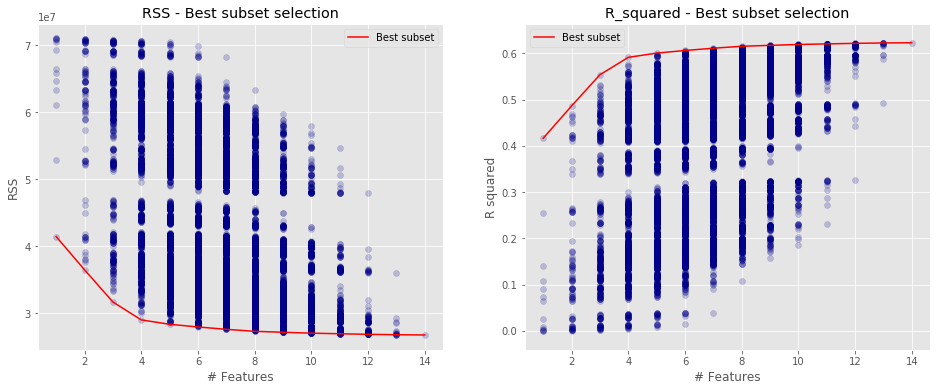

In [245]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()